exploring your chosen datasets, tuning the algorithms you learned about, and writing a thorough analysis of your findings

# Inclusions in the report:

1. a description of your classification problems, and why you feel that they are interesting. To be at all interesting the problems should be non-trivial on the one hand, but capable of admitting comparisons and analysis of the various algorithms on the other. Avoid the mistake of working on the largest most complicated and messy dataset you can find. The key is to be interesting and clear, no points for hairy and complex

2. the training and testing error rates you obtained running the various learning algorithms on your problems. At the very least you should include graphs that show performance on both training and test data as a function of training size (note that this implies that you need to design a classification problem that has more than a trivial amount of data) and--for the algorithms that are iterative--training times/iterations. Both of these kinds of graphs are referred to as learning curves, BTW.

3. analyses of your results. Why did you get the results you did? Compare and contrast the different algorithms. 
    - What sort of changes might you make to each of those algorithms to improve performance? 
    - How fast were they in terms of wall clock time? Iterations? 
    - Would cross validation help (and if it would, why didn't you implement it?)? 
    - How much performance was due to the problems you chose? 
    - How about the values you choose for learning rates, stopping criteria, pruning methods, and so forth (and why doesn't your analysis show results for the different values you chose? Please do look at more than one. 
    - And please make sure you understand it, it only counts if the results are meaningful)? 
    - Which algorithm performed best? 
    - How do you define best? Be creative and think of as many questions you can, and as many answers as you can but a lot of the questions boil down to: why... WHY WHY WHY?

**It is not about test cases and clearcut answers; rather, it is about understanding your results and articulating that understanding. **

**proper naming scheme**
- README.txt
- yourgtaccount-analysis.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exporation and treatment

## Bank marketing Sample data from UCI library

- 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

**Data Description**

**Please note this decription is taken from UCI ML library**

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


### Attribute Information:

While the Raw data contains 17 features + 1 target variable, where only 10 of the features are further selected and converted in the subsequent cells. 

Input Features:
#### bank client data:
1.  age (numeric)
2.  job : type of job. only 4 jobs are selected for onehot encoding : 'admin.', 'technician', 'blue-collar', 'management', these jobs correspond to 68% ofthe population. Each corresponding to atleast 10% of population, this is done to limit any disproportionate class representation based biases in job.
3.  marital : marital status. there are 3 catagories'divorced','married','single'. All of these are onehot encoded. 
4.  education : there are 4 categories of education, as these may have different weights, these are onehot encoded, ['secondary', 'tertiary', 'primary', 'unknown'].
5.  default: represents if the customer has credit in default? (categorical: 'no','yes'), converted to numric.
6.  housing: has housing loan? (categorical: 'no','yes'), converted to numric.
7.  loan: has personal loan? (categorical: 'no','yes'), converted to numric.
8. balance : Bank balance
### other attributes:
9. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
10. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
11. previous: number of contacts performed before this campaign and for this client (numeric)


Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


Relevant Papers:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]



In [4]:
Data_1 = pd.read_csv('bank.csv')
#https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
#target variable
Data_1['deposit']=1*(Data_1['deposit']=='yes')


Data_1_ = pd.concat([
    
    
    Data_1[['age','balance','campaign','pdays','previous','deposit']]
    ,1*(Data_1[['default','housing','loan']]== 'yes'),
    pd.get_dummies(Data_1.education).iloc[:,:-1].add_suffix('_edu'),
    
    pd.get_dummies(Data_1.poutcome).iloc[:,:-1].add_suffix('_pout'),
    pd.get_dummies(Data_1.marital).iloc[:,:-1].add_suffix('_marriage'),
    pd.get_dummies(Data_1.job).iloc[:,:-1].loc[:,['admin.', 'technician', 'blue-collar', 'management'  ]   
        ].add_suffix('_job')
    
    
    ],


axis =1)




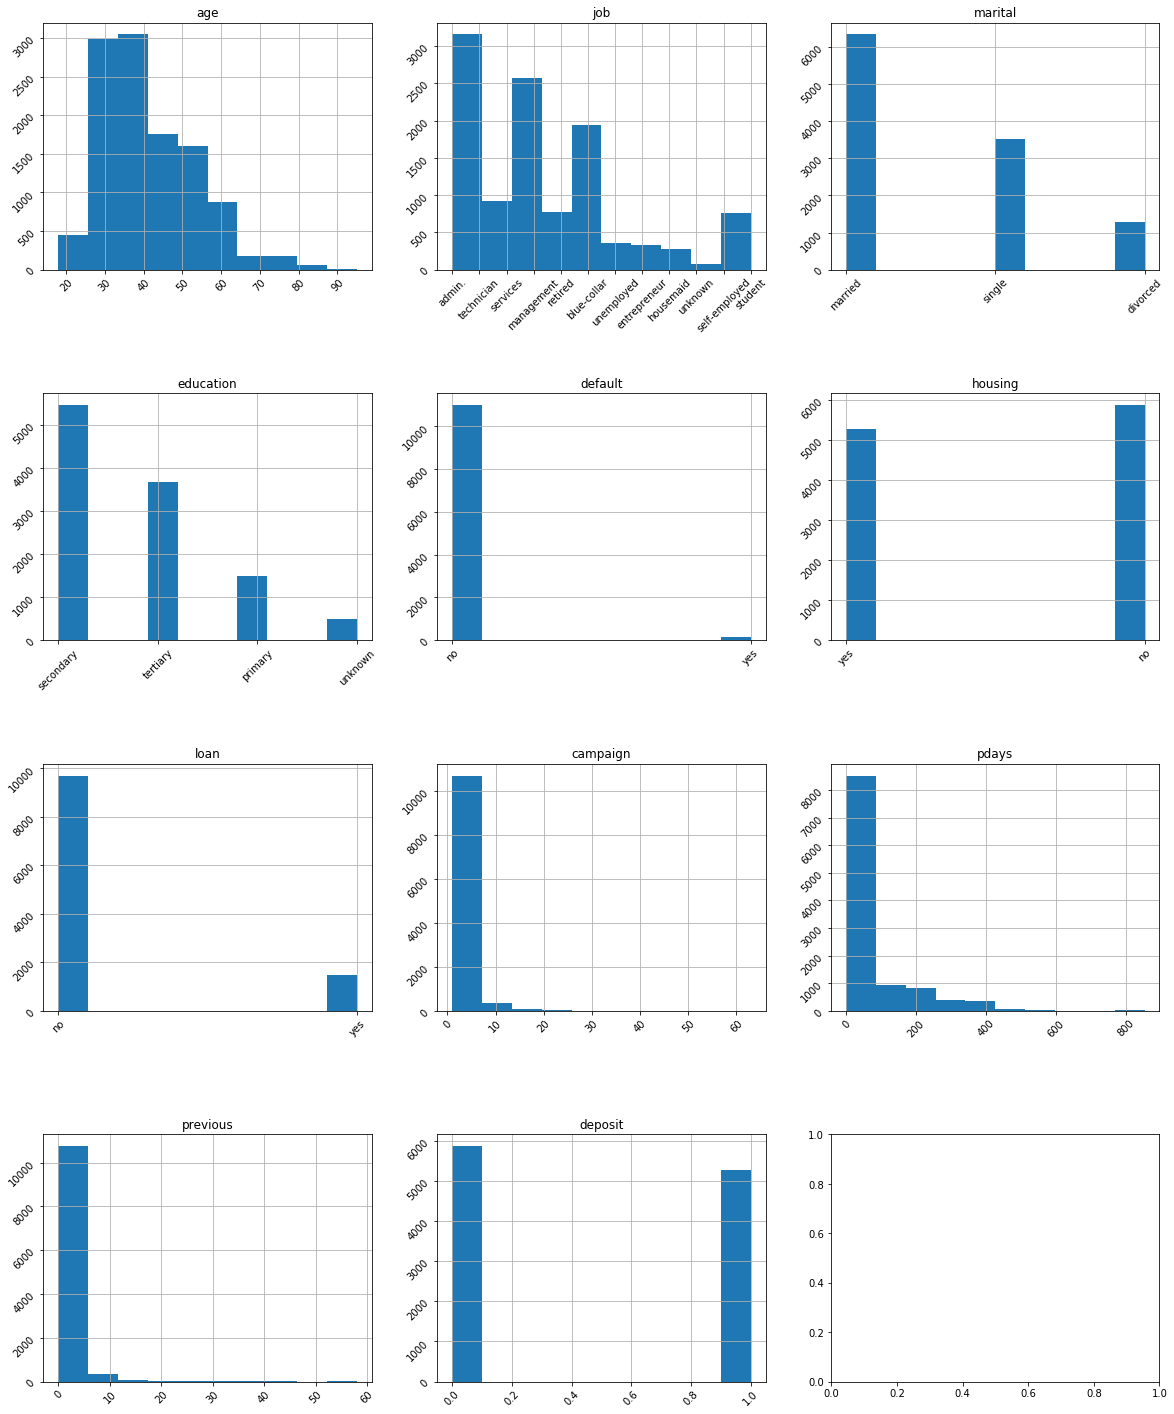

In [5]:
# feature summary
selected_features = ['age',
'job',
'marital',
'education',
'default',
'housing',
'loan',
'campaign',
'pdays',
'previous','deposit']
fig,axes = plt.subplots(4,3, figsize = [20,25])
for i,axe in zip(selected_features, axes.reshape(-1)):
    Data_1[i].hist(ax = axe, label = i)
    axe.tick_params(labelrotation=45)
    axe.set_title(i)
fig.subplots_adjust(hspace=.5)
plt.show()

# as it can be seen that all the five features are highly skewed. 

## Validation/correlation of feature and target

The selected features may individually or combined may help in predicting the chances of deposit. We assume that for add such an information these features may individually also give some indication,

for simplicity we are performing basic check for visible difference between the probabilty of deposit at difference value/value buckets. No additional feature procedure is used to avoid any additional bias addition, as we want to study the behaviour of the algorithms

**Based on the results below, each feature show visible difference in avg deposite of the bernauli distribution ~ pbt of deposite**

In [107]:
Data_1['deposit'].mean()

0.4738398136534671

In [369]:
Data_1.shape

(11162, 17)

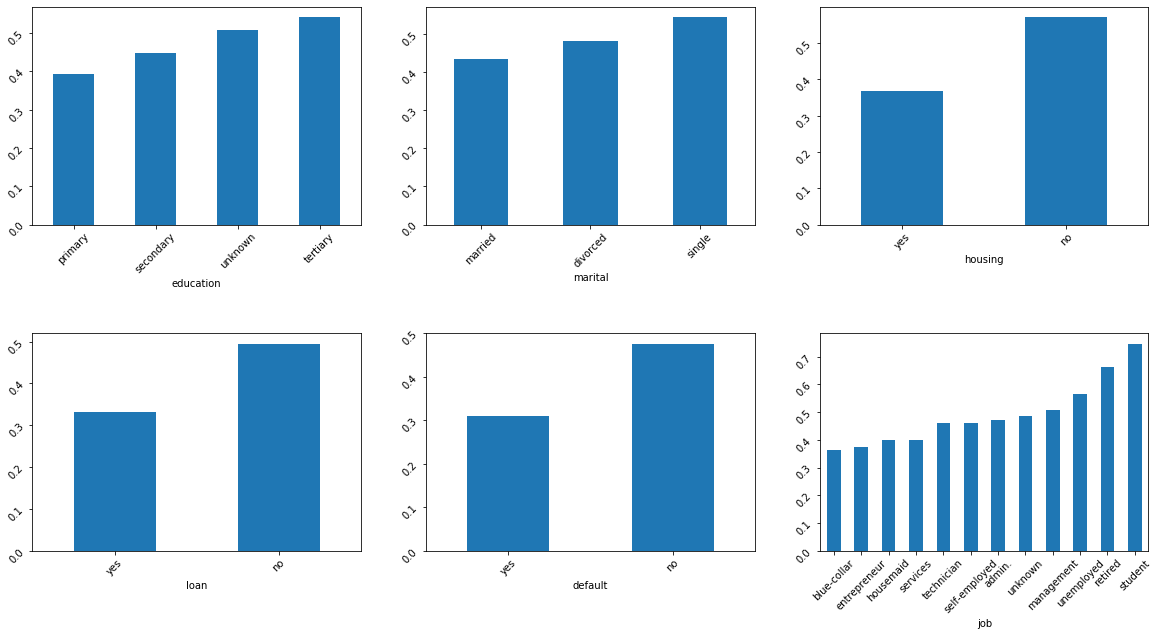

In [6]:
# Categorical features

numeric_features =  ['age','balance','campaign','pdays','previous']

cat_features = list(set(selected_features)-set(numeric_features) - {'deposit'})
fig,axes = plt.subplots(2,3, figsize = [20,10])
for i,axe in zip(cat_features, axes.reshape(-1)):
    Data_1.groupby([i]).deposit.mean().sort_values().plot.bar(ax = axe)
    axe.tick_params(labelrotation=45)
    #axe.set_title(i)

fig.subplots_adjust(hspace=.5)
plt.show()


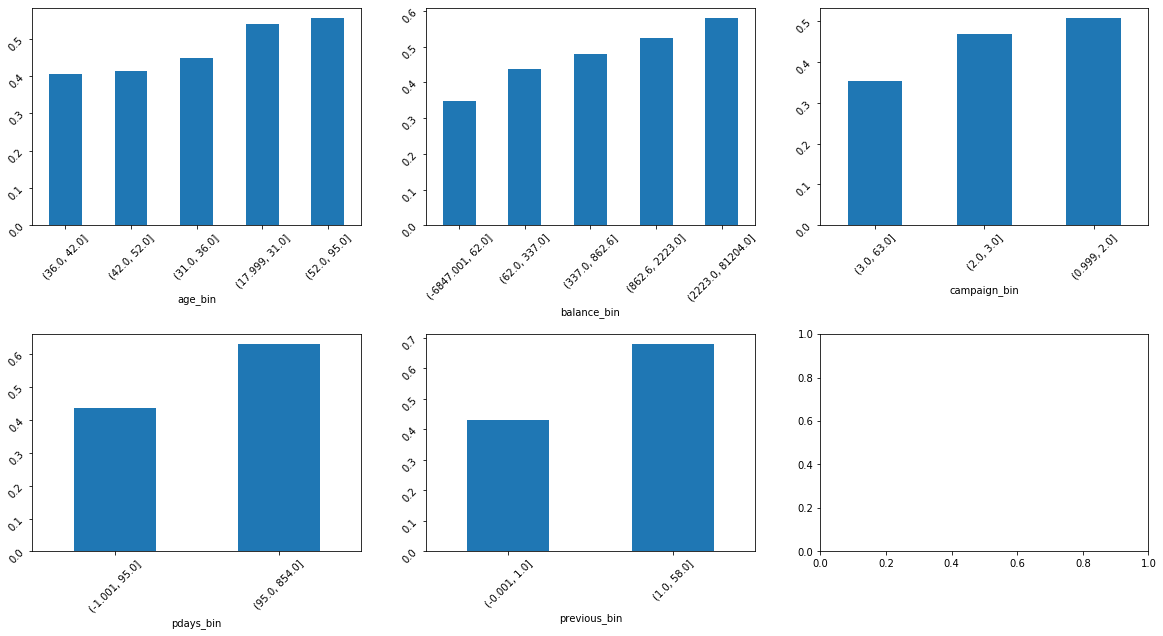

In [7]:
#numeric_features
Data_1_copy = Data_1.copy()
for i in numeric_features:
    Data_1_copy[i+'_bin'] = pd.cut(Data_1_copy[i], np.unique(Data_1_copy[i].quantile([0,0.2,0.4,0.6,0.8,1])), include_lowest = True)

    
fig,axes = plt.subplots(2,3, figsize = [20,10])
for i,axe in zip(numeric_features, axes.reshape(-1)):
    Data_1_copy.groupby([i+'_bin']).deposit.mean().sort_values().plot.bar(ax = axe)
    axe.tick_params(labelrotation=45)
    #axe.set_title(i)

fig.subplots_adjust(hspace=.5)
plt.show()    


In [14]:
Data_1_.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0
deposit,11162.0,0.473840,0.499338,0.0,0.0,0.0,1.00,1.0
default,11162.0,0.015051,0.121761,0.0,0.0,0.0,0.00,1.0
housing,11162.0,0.473123,0.499299,0.0,0.0,0.0,1.00,1.0
loan,11162.0,0.130801,0.337198,0.0,0.0,0.0,0.00,1.0
primary_edu,11162.0,0.134385,0.341080,0.0,0.0,0.0,0.00,1.0


In [33]:

Data_1_training_data = pd.read_csv('Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')


In [378]:
Data_2_training_data = pd.read_csv('csgo_round_snapshots.csv')

In [380]:
Data_2_training_data['round_winner'] = 1*(Data_2_training_data['round_winner'] =='CT')

In [386]:
Data_2_training_data.corr().iloc[:,-1].sort_values()

t_helmets              -0.297458
t_armor                -0.290753
t_weapon_ak47          -0.194147
bomb_planted           -0.187101
t_grenade_flashbang    -0.166839
                          ...   
ct_weapon_g3sg1              NaN
t_weapon_m249                NaN
ct_weapon_negev              NaN
ct_weapon_r8revolver         NaN
ct_weapon_sawedoff           NaN
Name: round_winner, Length: 96, dtype: float64

In [48]:



#scaler.fit(data_1_x.T)

In [8]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Data_1_.drop('deposit',axis =1), Data_1['deposit'], test_size=0.3, random_state=1) # 70% training and 30% test
from sklearn.preprocessing import StandardScaler

scaler_d1_1 = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler_d1_1.fit(X_train)

X_train_scaled.iloc[:] = scaler_d1_1.transform(X_train)
X_test_scaled.iloc[:] = scaler_d1_1.transform(X_test)


# Implimentations

## Decision Trees.

 For the decision tree, you should implement or steal a decision tree algorithm (and by "implement or steal" I mean "steal"). Be sure to use some form of pruning. You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.


In [464]:
GridSearchCV??

In [10]:

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV, HalvingGridSearchCV,GridSearchCV
from scipy.stats import randint,uniform
import numpy as np



In [11]:
score = ['neg_log_loss','roc_auc']

In [44]:


clf = DecisionTreeClassifier(random_state=0)
np.random.seed(0)

#param_distributions = {"max_leaf_nodes": randint(2, 20),#uniform(loc=0, scale=10),
#                       "min_samples_split": randint(2, 200)
#                      }
#search = HalvingRandomSearchCV(clf, param_distributions,
#                               #resource='n_estimators',
#                               #max_resources=10,
#                               n_jobs=-1,
#                               random_state=0).fit(X_train,y_train.values)
#search.best_params_  
#
#

param_distributions = {"max_leaf_nodes": list(range(2,50)),#uniform(loc=0, scale=10),
                       "min_samples_split": [2,10,20]
                      }

DT = GridSearchCV(clf, param_distributions,
                               #resource='n_estimators',
                               #max_resources=10,
                               n_jobs=-1,cv = 5,scoring = score #:'neg_log_loss', 'roc_auc':'roc_auc'}
                      ,return_train_score=True, refit = 'neg_log_loss'
                      #,
                     #          random_state=0
                     ).fit(X_train,y_train.values)
 



with open('models/DT_grid_t1.pkl', 'wb') as fh:
    pickle.dump(DT, fh)

In [46]:
DT.best_params_

{'max_leaf_nodes': 13, 'min_samples_split': 2}

In [110]:
from sklearn.tree import plot_tree

In [113]:
plot_tree??

[Text(0.6538461538461539, 0.9375, 'success_pout <= 0.5\ngini = 0.499\nsamples = 100.0%\nvalue = [0.526, 0.474]'),
 Text(0.5769230769230769, 0.8125, 'housing <= 0.5\ngini = 0.489\nsamples = 90.3%\nvalue = [0.574, 0.426]'),
 Text(0.38461538461538464, 0.6875, 'balance <= 201.5\ngini = 0.499\nsamples = 45.0%\nvalue = [0.483, 0.517]'),
 Text(0.23076923076923078, 0.5625, 'age <= 60.5\ngini = 0.47\nsamples = 13.3%\nvalue = [0.623, 0.377]'),
 Text(0.15384615384615385, 0.4375, 'age <= 28.5\ngini = 0.461\nsamples = 12.8%\nvalue = [0.639, 0.361]'),
 Text(0.07692307692307693, 0.3125, 'gini = 0.492\nsamples = 1.6%\nvalue = [0.435, 0.565]'),
 Text(0.23076923076923078, 0.3125, 'pdays <= 1.5\ngini = 0.443\nsamples = 11.2%\nvalue = [0.668, 0.332]'),
 Text(0.15384615384615385, 0.1875, 'gini = 0.423\nsamples = 10.0%\nvalue = [0.696, 0.304]'),
 Text(0.3076923076923077, 0.1875, 'gini = 0.492\nsamples = 1.2%\nvalue = [0.436, 0.564]'),
 Text(0.3076923076923077, 0.4375, 'gini = 0.349\nsamples = 0.5%\nvalue = 

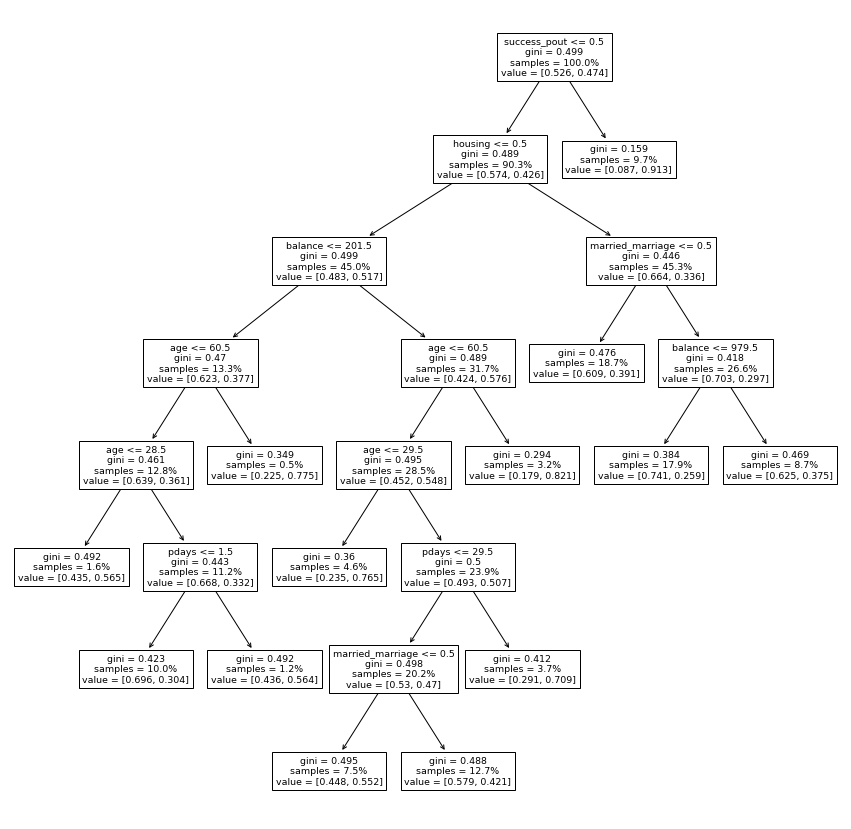

In [116]:
fig, ax = plt.subplots(figsize = [15,15])
plot_tree(DT.best_estimator_, feature_names = X_train.columns, ax = ax, proportion = True )

In [26]:
Decision_tree_performance_df

,mean_fit_time,mean_score_time,mean_test_neg_log_loss,mean_train_neg_log_loss,mean_test_roc_auc,mean_train_roc_auc,max_leaf_nodes,min_samples_split
0,0.017794,0.007599,-0.644908,-0.644528,0.585759,0.585760,2,2
1,0.015800,0.007599,-0.644908,-0.644528,0.585759,0.585760,2,10
2,0.014763,0.004962,-0.644908,-0.644528,0.585759,0.585760,2,20
3,0.015105,0.006127,-0.629964,-0.629317,0.659696,0.659662,3,2
4,0.015509,0.006253,-0.629964,-0.629317,0.659696,0.659662,3,10
...,...,...,...,...,...,...,...,...
139,0.034200,0.007602,-0.674879,-0.570545,0.711648,0.757594,48,10
140,0.032361,0.007599,-0.675567,-0.570612,0.710226,0.757714,48,20
141,0.035204,0.008444,-0.687604,-0.569677,0.711276,0.758381,49,2
142,0.035490,0.008202,-0.688391,-0.569761,0.710436,0.758350,49,10


In [47]:
Decision_tree_performance_df = pd.concat([pd.DataFrame({ i:DT.cv_results_[i] for i in ['mean_fit_time','mean_score_time','mean_test_neg_log_loss','mean_train_neg_log_loss',
                                                                               
                                                                               'mean_test_roc_auc','mean_train_roc_auc'
                                                                               ] }
            ), pd.DataFrame(pd.DataFrame.from_records(DT.cv_results_['params']))],axis =1)

Decision_tree_performance_df.to_csv('Data_frames/Decision_tree_performance_df.csv')

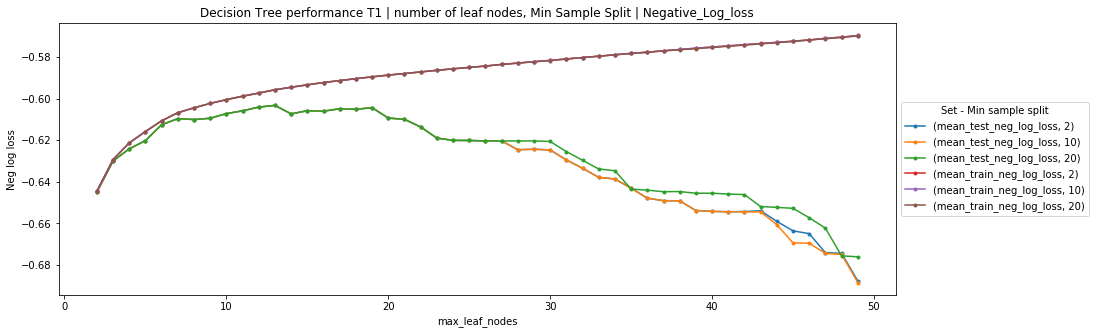

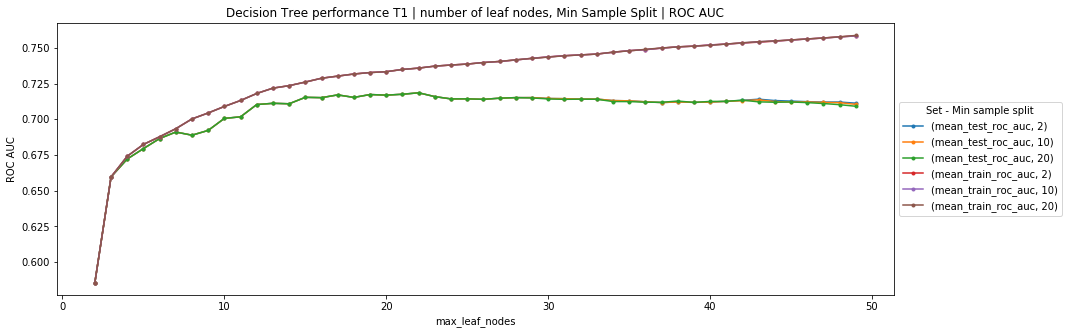

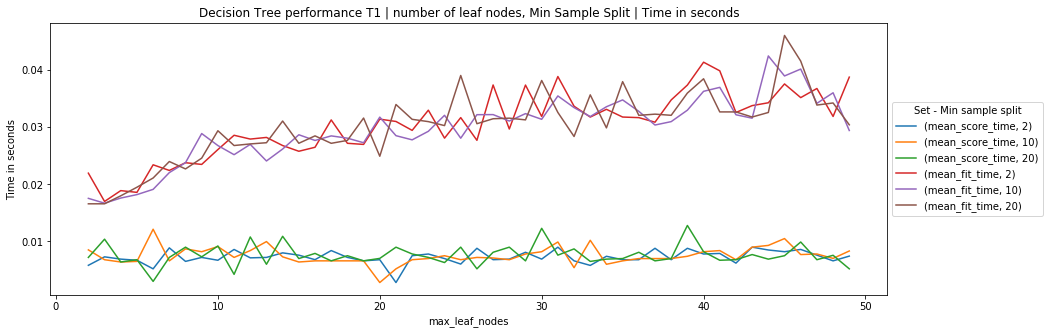

In [52]:

dt_neg_ll =  Decision_tree_performance_df.pivot(index='max_leaf_nodes', columns='min_samples_split',
                                                values=['mean_test_neg_log_loss','mean_train_neg_log_loss']).plot(
                        title = 'Decision Tree performance T1 | number of leaf nodes, Min Sample Split | Negative_Log_loss',
                                                                         figsize = [15,5] ,marker = '.', legend = True
                                                                         )


dt_neg_ll.set_ylabel('Neg log loss')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Set - Min sample split')
plt.show()

dt_roc_auc = Decision_tree_performance_df.pivot(index='max_leaf_nodes', columns='min_samples_split',
                                                values=[ 'mean_test_roc_auc','mean_train_roc_auc']).plot(
                        title = 'Decision Tree performance T1 | number of leaf nodes, Min Sample Split | ROC AUC',
                                                                         figsize = [15,5] ,marker = '.', legend = True
                                                                         )


dt_roc_auc.set_ylabel('ROC AUC')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Set - Min sample split')
plt.show()

dt_neg_ll_time =  Decision_tree_performance_df.pivot(index='max_leaf_nodes', columns='min_samples_split',
                                                values=['mean_score_time','mean_fit_time']).plot(
                    title = 'Decision Tree performance T1 | number of leaf nodes, Min Sample Split | Time in seconds',
                                                                         figsize = [15,5] #,marker = '.'
    , legend = True
                                                                         )


dt_neg_ll_time.set_ylabel('Time in seconds')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Set - Min sample split')
plt.show()

In [460]:
Decision_tree_performance_df.loc[list(search.best_params_.values())[0]]

mean_fit_time       0.025000
mean_score_time     0.006249
mean_test_score    -0.603290
mean_train_score   -0.595779
Name: 13, dtype: float64

In [49]:
print('neg_log_loss on test data',
-1*metrics.log_loss(y_pred = DT.best_estimator_.predict_proba(X_test)[:,1],y_true = y_test.values) )
print('roc_auc on test data',
metrics.roc_auc_score(y_score= DT.best_estimator_.predict_proba(X_test)[:,1],y_true = y_test.values) )

neg_log_loss on test data -0.6139716519456547
roc_auc on test data 0.706102144001373


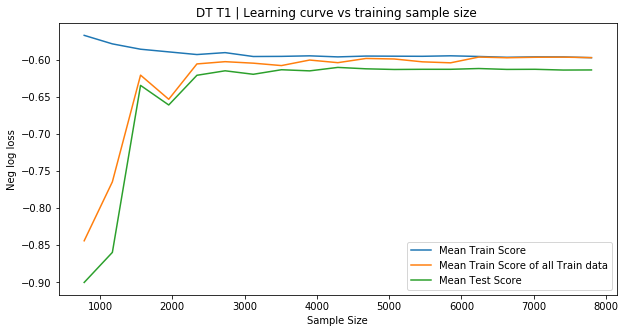

Wall time: 1.51 s


In [76]:
%%time
sample_count= list(range(int(X_train.shape[0]/10), X_train.shape[0],int(X_train.shape[0]/20)))



avg_dt_sample_size_train_nll = []
avg_dt_sample_size_all_train_nll = []
avg_dt_sample_size_test_nll = []

for i in sample_count:
    np.random.seed(0)    
    clf_1 = DecisionTreeClassifier(**(DT.best_params_))
    clf_2 = DecisionTreeClassifier(**(DT.best_params_))
    clf_3 = DecisionTreeClassifier(**(DT.best_params_))
    train_1 = np.random.choice(X_train.shape[0], size=i, replace=False)  
    train_2 = np.random.choice(X_train.shape[0], size=i, replace=False)  
    train_3 = np.random.choice(X_train.shape[0], size=i, replace=False)  
    
    clf_1.fit(X_train.iloc[train_1], y_train.iloc[train_1]   )
    clf_2.fit(X_train.iloc[train_2], y_train.iloc[train_2]   )
    clf_3.fit(X_train.iloc[train_3], y_train.iloc[train_3]   )


    Avg_train_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_train.iloc[train_1])[:,1],y_true = y_train.iloc[train_1].values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_train.iloc[train_2])[:,1],y_true = y_train.iloc[train_2].values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_train.iloc[train_3])[:,1],y_true = y_train.iloc[train_3].values)
    
    
    
    ])    
    
    
    
    
    
    
    
    
    Avg_All_train_Data_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_train)[:,1],y_true = y_train.values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_train)[:,1],y_true = y_train.values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_train)[:,1],y_true = y_train.values)
    
    
    
    ])
    
    
    Avg_test_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_test)[:,1],y_true = y_test.values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_test)[:,1],y_true = y_test.values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_test)[:,1],y_true = y_test.values)
    
    
    
    ])
    
    
    avg_dt_sample_size_train_nll.append(Avg_train_log_loss)
    avg_dt_sample_size_all_train_nll.append(Avg_All_train_Data_log_loss)
    avg_dt_sample_size_test_nll.append(Avg_test_log_loss)
    
    

DT_Sample_size_learning_curve = pd.DataFrame({'Mean Train Score':avg_dt_sample_size_train_nll , 'Mean Train Score of all Train data' : avg_dt_sample_size_all_train_nll
              
              , 'Mean Test Score':avg_dt_sample_size_test_nll
              
             }, index  = sample_count
              )

DT_Sample_size_learning_curve.index.name = 'Sample Size'
DT_Sample_size_learning_curve.to_csv('Data_frames/DT_Sample_size_learning_curve_t1.csv')
dt_neg_ll_sample_size  = DT_Sample_size_learning_curve.plot(figsize = [10,5], title = 'DT T1 | Learning curve vs training sample size ')
dt_neg_ll_sample_size.set_ylabel('Neg log loss')
plt.show()

1. What sort of changes might you make to each of those algorithms to improve performance?
    - Even with the use of cross validation set, it can be seen that the performance of the model on CV and train is better than test set, this might point to overfitting, and therefore further measures can be taken to reduce this overfitting, like limit on minimum number of sample required to evaluate and break a node further. better feature selection could be done, in terms of class representation and distribution.
1. How fast were they in terms of wall clock time? Iterations?
    - As decision tree is an eager learner the training time is comparitively higher than scoring time. Training time was also found proportional to the complexity, in terms of maximum number of leaf nodes. minimum avg training time was 0.0142 seconds at 5 leaf nodes and maximum Training time was as 0.050770 at 30 leaf nodes. Where the max scoring time was 0.0142 at 29 leaf nodes.
1. Would cross validation help (and if it would, why didn't you implement it?)?
    - CV is an essential part of perfromance insurance, as it can be seen, with the increase in the complexity, the training error reduces, however as the model fits to deviation of training sample, the error on test/validation increases and therefore cross validation helps to avoid overfitting. 
1. How much performance was due to the problems you chose?
    - 
1. How about the values you choose for learning rates, stopping criteria, pruning methods, and so forth (and why doesn't your analysis show results for the different values you chose? Please do look at more than one. And please make sure you understand it, it only counts if the results are meaningful)?
    - 
1. Which algorithm performed best?
1. How do you define best? Be creative and think of as many questions you can, and as many answers as you can but a lot of the questions boil down to: why... WHY WHY WHY?

## Neural Networks.
For the neural network you should implement or steal your favorite kind of network and training algorithm. You may use networks of nodes with as many layers as you like and any activation function you see fit.

In [31]:
import torch
import numpy as np

In [526]:
#from skorch import NeuralNetClassifier

In [50]:
from sklearn.neural_network import MLPClassifier

In [527]:
MLPClassifier??

In [ ]:
X_train_scaled
X_test_scaled

In [51]:
params = {
    'hidden_layer_sizes': [(2,2), (4,4),(8,8), (16, 16),(32,32),(64,64)],
    "learning_rate_init" : [0.1,0.03,0.01,0.003, 0.001, 0.0001]
}
NN_hidd = GridSearchCV(
    MLPClassifier(max_iter=1500, random_state=0,learning_rate='adaptive'), params, cv=5, n_jobs=-1, verbose=3,
    scoring = score #:'neg_log_loss', 'roc_auc':'roc_auc'}
                          ,return_train_score=True, refit = 'neg_log_loss'


)
NN_hidd.fit(X_train_scaled, y_train)

#y_pred = NN_.predict(X_test)
with open('models/nn_grid_t1.pkl', 'wb') as fh:
    pickle.dump(NN_hidd, fh)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [53]:

NN_hidd.best_params_

{'hidden_layer_sizes': (4, 4), 'learning_rate_init': 0.01}

In [54]:
NN_performance_df = pd.concat([pd.DataFrame({ i:NN_hidd.cv_results_[i] for i in ['mean_fit_time','mean_score_time','mean_test_neg_log_loss','mean_train_neg_log_loss',
                                                                               
                                                                               'mean_test_roc_auc','mean_train_roc_auc'
                                                                               ] }
            ), pd.DataFrame(pd.DataFrame.from_records(NN_hidd.cv_results_['params']))],axis =1)

NN_performance_df.to_csv('Data_frames/NN_performance_df.csv')

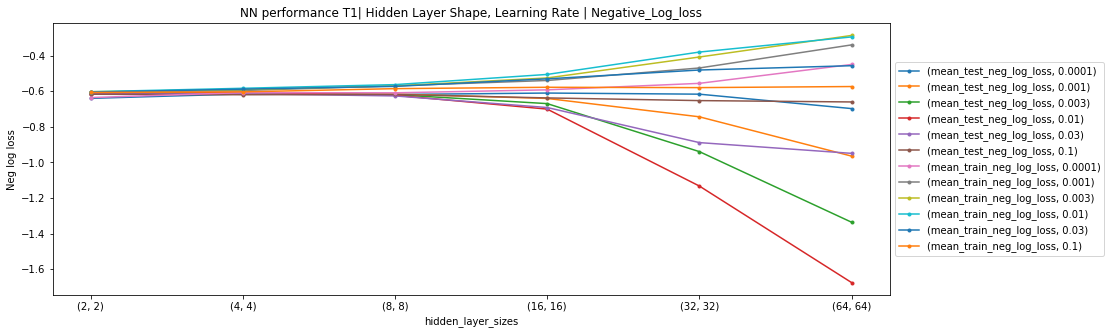

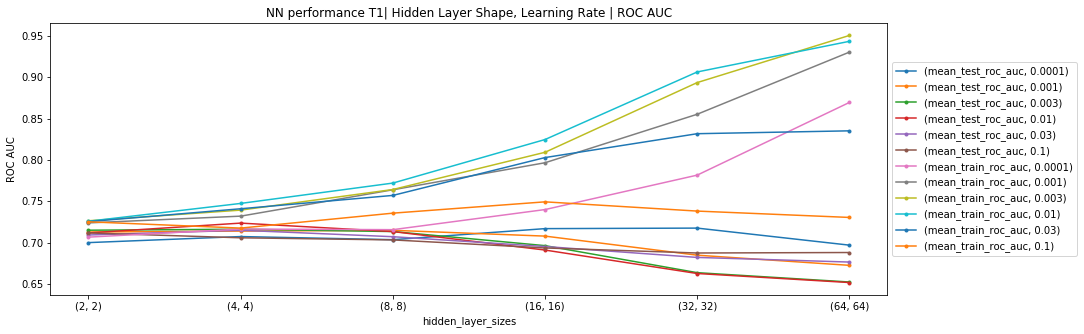

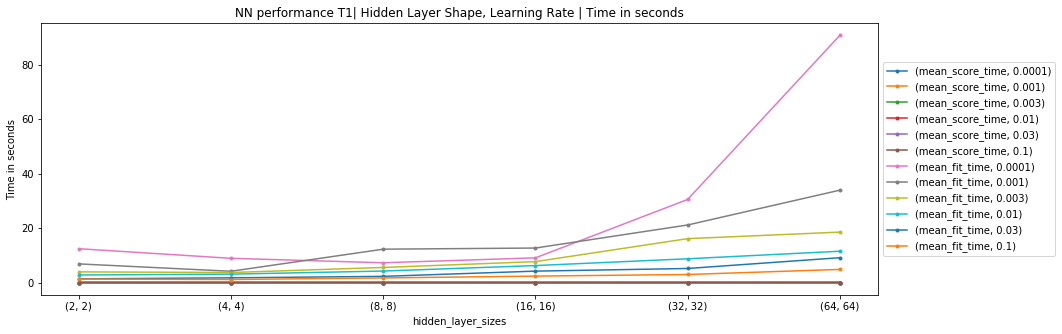

In [55]:

NN_hidd_neg_ll =  NN_performance_df.pivot(index='hidden_layer_sizes', columns='learning_rate_init',
                                                values=['mean_test_neg_log_loss','mean_train_neg_log_loss']).plot(
                        title = 'NN performance T1| Hidden Layer Shape, Learning Rate | Negative_Log_loss',
                                                                         figsize = [15,5] ,marker = '.', legend = True
                                                                         )


NN_hidd_neg_ll.set_ylabel('Neg log loss')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

NN_hidd_roc_auc = NN_performance_df.pivot(index='hidden_layer_sizes', columns='learning_rate_init',
                                                values=[ 'mean_test_roc_auc','mean_train_roc_auc']).plot(
                        title = 'NN performance T1| Hidden Layer Shape, Learning Rate | ROC AUC',
                                                                         figsize = [15,5] ,marker = '.', legend = True
                                                                         )


NN_hidd_roc_auc.set_ylabel('ROC AUC')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

NN_hidd_neg_ll_time =  NN_performance_df.pivot(index='hidden_layer_sizes', columns='learning_rate_init',
                                                values=['mean_score_time','mean_fit_time']).plot(
                    title = 'NN performance T1| Hidden Layer Shape, Learning Rate | Time in seconds',
                                                                         figsize = [15,5] ,marker = '.'
    , legend = True
                                                                         )


NN_hidd_neg_ll_time.set_ylabel('Time in seconds')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [56]:

print('NN neg_log_loss on test data',
-1*metrics.log_loss(y_pred = NN_hidd.best_estimator_.predict_proba(X_test_scaled)[:,1],y_true = y_test.values) )
print('NN roc_auc on test data',
metrics.roc_auc_score(y_score= NN_hidd.best_estimator_.predict_proba(X_test_scaled)[:,1],y_true = y_test.values) )

NN neg_log_loss on test data -0.6063599983336957
NN roc_auc on test data 0.7151859016534127


In [645]:
    def _init_coef(self, fan_in, fan_out):
        if self.activation == 'logistic':
            # Use the initialization method recommended by
            # Glorot et al.
            init_bound = np.sqrt(2. / (fan_in + fan_out))
        elif self.activation in ('identity', 'tanh', 'relu'):
            init_bound = np.sqrt(6. / (fan_in + fan_out))
        else:
            # this was caught earlier, just to make sure
            raise ValueError("Unknown activation function %s" %
                             self.activation)

        coef_init = self._random_state.uniform(-init_bound, init_bound,
                                               (fan_in, fan_out))
        intercept_init = self._random_state.uniform(-init_bound, init_bound,
                                                    fan_out)
        return coef_init, intercept_init

In [77]:




list_itter = list(range(1,100,10)) +  list(range(100,1500,100))




params = {

    "max_iter" : list_itter
}
NN_itter = GridSearchCV(
    MLPClassifier(random_state=0,learning_rate='adaptive',
                  **(NN_hidd.best_params_)), params, cv=5, n_jobs=-1, verbose=3,
    scoring = score #:'neg_log_loss', 'roc_auc':'roc_auc'}
                          ,return_train_score=True, refit = 'neg_log_loss'


)
NN_itter.fit(X_train_scaled, y_train)

#y_pred = NN_.predict(X_test)



with open('models/nn_itter_t1.pkl', 'wb') as fh:
    pickle.dump(NN_itter, fh)

    

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\ashup\.conda\envs\Cryptic_DVA_2022\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


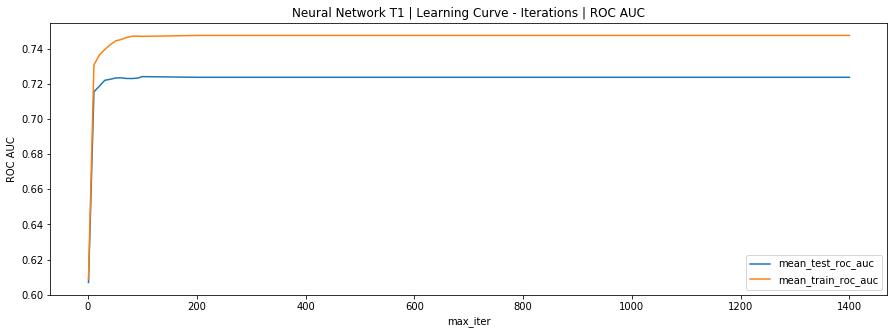

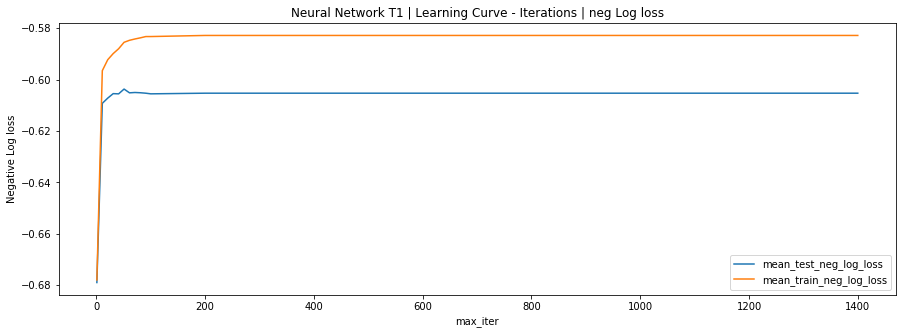

In [79]:
#NN_itter.cv_results_

NN_itter_performance_df = pd.DataFrame({ i:NN_itter.cv_results_[i] for i in ['mean_fit_time','mean_score_time','mean_test_neg_log_loss','mean_train_neg_log_loss',
                                                                               
                                                                               'mean_test_roc_auc','mean_train_roc_auc'
                                                                               ] },
                                     
                                     
                                     index = pd.DataFrame(NN_itter.cv_results_['params'])['max_iter'])

NN_itter_performance_df.to_csv('Data_frames/NN_itter_performance_df_t1.csv')

NN_itter_plot_roc_auc = NN_itter_performance_df[['mean_test_roc_auc','mean_train_roc_auc']].plot(figsize=[15,5],
                                                                                                
                                                title = 'Neural Network T1 | Learning Curve - Iterations | ROC AUC'
                                                                                                )

NN_itter_plot_roc_auc.set_ylabel('ROC AUC')
plt.show()

NN_itter_plot_nll = NN_itter_performance_df[['mean_test_neg_log_loss','mean_train_neg_log_loss']].plot(figsize=[15,5],
                                                                                                                                      
                                                title = 'Neural Network T1 | Learning Curve - Iterations | neg Log loss'
                                                                                                )

NN_itter_plot_nll.set_ylabel('Negative Log loss')
plt.show()

In [78]:
NN_itter.best_params_

{'max_iter': 51}

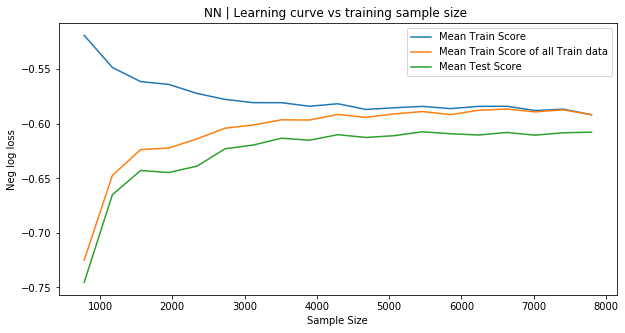

In [80]:
sample_count= list(range(int(X_train.shape[0]/10), X_train.shape[0],int(X_train.shape[0]/20)))



avg_NN_sample_size_train_nll = []
avg_NN_sample_size_all_train_nll = []
avg_NN_sample_size_test_nll = []

for i in sample_count:
    np.random.seed(0)    
    clf_1 = MLPClassifier(max_iter=500,learning_rate='adaptive',
                  **(NN_hidd.best_params_))
    clf_2 = MLPClassifier(max_iter=500,learning_rate='adaptive',
                  **(NN_hidd.best_params_))
    clf_3 = MLPClassifier(max_iter=500,learning_rate='adaptive',
                  **(NN_hidd.best_params_))
    train_1 = np.random.choice(X_train_scaled.shape[0], size=i, replace=False)  
    train_2 = np.random.choice(X_train_scaled.shape[0], size=i, replace=False)  
    train_3 = np.random.choice(X_train_scaled.shape[0], size=i, replace=False)  
    
    clf_1.fit(X_train_scaled.iloc[train_1], y_train.iloc[train_1]   )
    clf_2.fit(X_train_scaled.iloc[train_2], y_train.iloc[train_2]   )
    clf_3.fit(X_train_scaled.iloc[train_3], y_train.iloc[train_3]   )


    Avg_train_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_train_scaled.iloc[train_1])[:,1],y_true = y_train.iloc[train_1].values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_train_scaled.iloc[train_2])[:,1],y_true = y_train.iloc[train_2].values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_train_scaled.iloc[train_3])[:,1],y_true = y_train.iloc[train_3].values)
    
    
    
    ])    
    
    
    
    
    
    
    
    
    Avg_All_train_Data_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_train_scaled)[:,1],y_true = y_train.values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_train_scaled)[:,1],y_true = y_train.values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_train_scaled)[:,1],y_true = y_train.values)
    
    
    
    ])
    
    
    Avg_test_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_test_scaled)[:,1],y_true = y_test.values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_test_scaled)[:,1],y_true = y_test.values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_test_scaled)[:,1],y_true = y_test.values)
    
    
    
    ])
    
    
    avg_NN_sample_size_train_nll.append(Avg_train_log_loss)
    avg_NN_sample_size_all_train_nll.append(Avg_All_train_Data_log_loss)
    avg_NN_sample_size_test_nll.append(Avg_test_log_loss)
    
    

NN_Sample_size_learning_curve = pd.DataFrame({'Mean Train Score':avg_NN_sample_size_train_nll , 'Mean Train Score of all Train data' : avg_NN_sample_size_all_train_nll
              
              , 'Mean Test Score':avg_NN_sample_size_test_nll
              
             }, index  = sample_count
              )

NN_Sample_size_learning_curve.index.name = 'Sample Size'
NN_Sample_size_learning_curve.to_csv('Data_frames/NN_Sample_size_learning_curve_t1.csv')


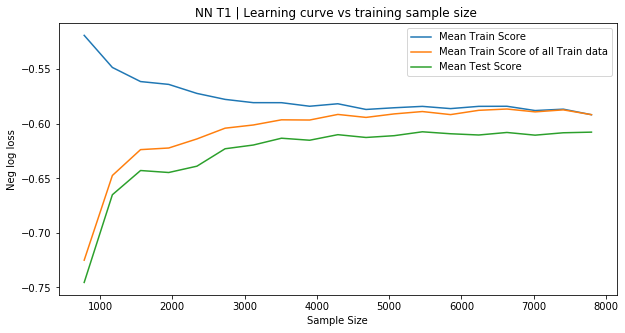

In [81]:
NN_neg_ll_sample_size  = NN_Sample_size_learning_curve.plot(figsize = [10,5], title = 'NN T1 | Learning curve vs training sample size ')
NN_neg_ll_sample_size.set_ylabel('Neg log loss')
plt.show()

## Boosting. 
Implement or steal a boosted version of your decision trees. As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
params = { "base_estimator__max_leaf_nodes" : [2,5,10], # very limited leaves for a weak classifier 
    'n_estimators': (list(range(11,51,5))+list(range(51,101,10))),
}
boosting_ll = GridSearchCV(
    AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), random_state=0,
                      
                      learning_rate = 0.01
                      
                      ), params, cv=5, n_jobs=-1, verbose=3,
                scoring = score
                          ,return_train_score=True, refit = 'neg_log_loss'


)
boosting_ll.fit(X_train, y_train)
with open('models/boosting_t1.pkl', 'wb') as fh:
    pickle.dump(boosting_ll, fh)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


In [59]:

boosting_ll.best_params_

{'base_estimator__max_leaf_nodes': 10, 'n_estimators': 36}

In [60]:
Boosting_performance_df = pd.concat([pd.DataFrame({ i:boosting_ll.cv_results_[i] for i in ['mean_fit_time','mean_score_time','mean_test_neg_log_loss','mean_train_neg_log_loss',
                                                                               
                                                                               'mean_test_roc_auc','mean_train_roc_auc'
                                                                               ] }
            ), pd.DataFrame(pd.DataFrame.from_records(boosting_ll.cv_results_['params']))],axis =1).rename(columns
                                                                                                          
                                                                                                          = {'base_estimator__max_leaf_nodes':'max_leaf_nodes'})


Boosting_performance_df.to_csv('Data_frames/Boosting_performance_df_t1.csv')

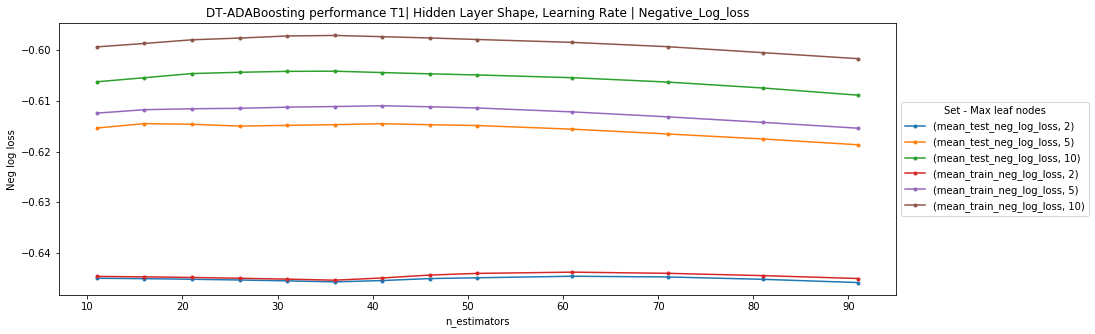

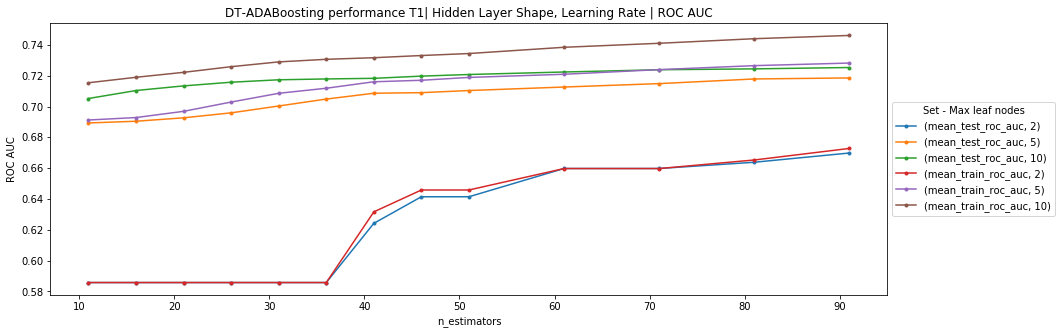

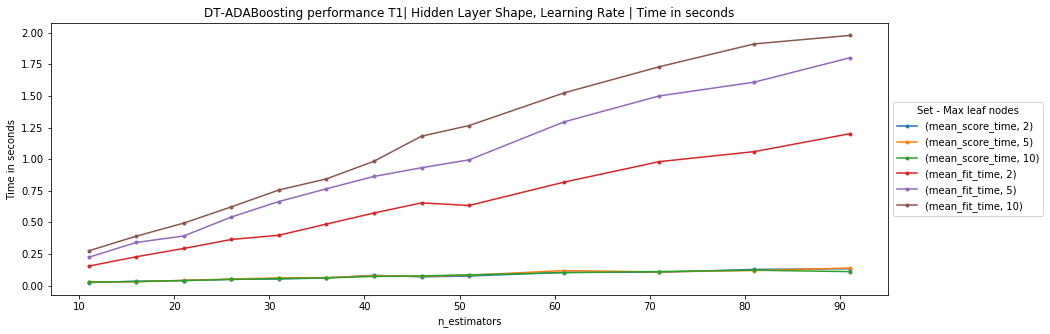

In [61]:

boosting_ll_neg_ll =  Boosting_performance_df.pivot(index='n_estimators', columns='max_leaf_nodes',
                                                values=['mean_test_neg_log_loss','mean_train_neg_log_loss']).plot(
                        title = 'DT-ADABoosting performance T1| Hidden Layer Shape, Learning Rate | Negative_Log_loss',
                                                                         figsize = [15,5] ,marker = '.', legend = True
                                                                         )


boosting_ll_neg_ll.set_ylabel('Neg log loss')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title ='Set - Max leaf nodes')
plt.show()

boosting_ll_roc_auc = Boosting_performance_df.pivot(index='n_estimators', columns='max_leaf_nodes',
                                                values=[ 'mean_test_roc_auc','mean_train_roc_auc']).plot(
                        title = 'DT-ADABoosting performance T1| Hidden Layer Shape, Learning Rate | ROC AUC',
                                                                         figsize = [15,5] ,marker = '.', legend = True
                                                                         )


boosting_ll_roc_auc.set_ylabel('ROC AUC')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title ='Set - Max leaf nodes')
plt.show()

boosting_ll_neg_ll_time =  Boosting_performance_df.pivot(index='n_estimators', columns='max_leaf_nodes',
                                                values=['mean_score_time','mean_fit_time']).plot(
                    title = 'DT-ADABoosting performance T1| Hidden Layer Shape, Learning Rate | Time in seconds',
                                                                         figsize = [15,5] ,marker = '.'
    , legend = True
                                                                         )


boosting_ll_neg_ll_time.set_ylabel('Time in seconds')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title ='Set - Max leaf nodes')
plt.show()

In [56]:
import copy

In [82]:
print('Bt neg_log_loss on test data',
-1*metrics.log_loss(y_pred = boosting_ll.best_estimator_.predict_proba(X_test)[:,1],y_true = y_test.values) )
print('Bt roc_auc on test data',
metrics.roc_auc_score(y_score= boosting_ll.best_estimator_.predict_proba(X_test)[:,1],y_true = y_test.values) )

Bt neg_log_loss on test data -0.6103986323567058
Bt roc_auc on test data 0.7129301590480005


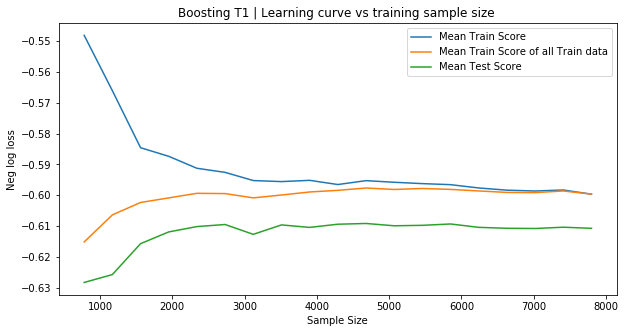

In [83]:
sample_count= list(range(int(X_train.shape[0]/10), X_train.shape[0],int(X_train.shape[0]/20)))



avg_Boosting_sample_size_train_nll = []
avg_Boosting_sample_size_all_train_nll = []
avg_Boosting_sample_size_test_nll = []

for i in sample_count:
    np.random.seed(0)    
    clf_1 = copy.deepcopy(boosting_ll.best_estimator_)
    clf_2 = copy.deepcopy(boosting_ll.best_estimator_)
    clf_3 = copy.deepcopy(boosting_ll.best_estimator_)
    train_1 = np.random.choice(X_train.shape[0], size=i, replace=False)  
    train_2 = np.random.choice(X_train.shape[0], size=i, replace=False)  
    train_3 = np.random.choice(X_train.shape[0], size=i, replace=False)  
    
    clf_1.fit(X_train.iloc[train_1], y_train.iloc[train_1]   )
    clf_2.fit(X_train.iloc[train_2], y_train.iloc[train_2]   )
    clf_3.fit(X_train.iloc[train_3], y_train.iloc[train_3]   )


    Avg_train_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_train.iloc[train_1])[:,1],y_true = y_train.iloc[train_1].values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_train.iloc[train_2])[:,1],y_true = y_train.iloc[train_2].values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_train.iloc[train_3])[:,1],y_true = y_train.iloc[train_3].values)
    
    
    
    ])    
    
    
    
    
    
    
    
    
    Avg_All_train_Data_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_train)[:,1],y_true = y_train.values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_train)[:,1],y_true = y_train.values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_train)[:,1],y_true = y_train.values)
    
    
    
    ])
    
    
    Avg_test_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_test)[:,1],y_true = y_test.values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_test)[:,1],y_true = y_test.values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_test)[:,1],y_true = y_test.values)
    
    
    
    ])
    
    
    avg_Boosting_sample_size_train_nll.append(Avg_train_log_loss)
    avg_Boosting_sample_size_all_train_nll.append(Avg_All_train_Data_log_loss)
    avg_Boosting_sample_size_test_nll.append(Avg_test_log_loss)
    
    

Boosting_Sample_size_learning_curve = pd.DataFrame({'Mean Train Score':avg_Boosting_sample_size_train_nll , 'Mean Train Score of all Train data' : avg_Boosting_sample_size_all_train_nll
              
              , 'Mean Test Score':avg_Boosting_sample_size_test_nll
              
             }, index  = sample_count
              )

Boosting_Sample_size_learning_curve.index.name = 'Sample Size'

Boosting_Sample_size_learning_curve.to_csv('Data_frames/Boosting_Sample_size_learning_curve_T1.csv')
Boosting_neg_ll_sample_size  = Boosting_Sample_size_learning_curve.plot(figsize = [10,5], title = 'Boosting T1 | Learning curve vs training sample size ')
Boosting_neg_ll_sample_size.set_ylabel('Neg log loss')
plt.show()

## Support Vector Machines. 
You should implement (for sufficiently loose definitions of implement including "download") SVMs. This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.

In [12]:
from sklearn.svm import SVC

In [28]:
SVC??

In [21]:
import pickle



In [36]:
params = { "kernel" : ['rbf','poly'],
    'C':[1,10,30,100,300,1000],
}

#cv = 3

svc = GridSearchCV(
    SVC(probability=True), params, cv=5, n_jobs=-1, verbose=3,
                scoring = score
                          ,return_train_score=True, refit = 'neg_log_loss'


)
svc.fit(X_train_scaled, y_train)

with open('models/svc_grid_t1.pkl', 'wb') as fh:
    pickle.dump(svc, fh)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [37]:

svc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [75]:
svc_performance_df = pd.concat([pd.DataFrame({ i:svc.cv_results_[i] for i in ['mean_fit_time','mean_score_time','mean_test_neg_log_loss','mean_train_neg_log_loss',
                                                                               
                                                                               'mean_test_roc_auc','mean_train_roc_auc'
                                                                               ] }
            ), pd.DataFrame(pd.DataFrame.from_records(svc.cv_results_['params']))],axis =1)

svc_performance_df.to_csv('Data_frames/svc_performance_df.csv')

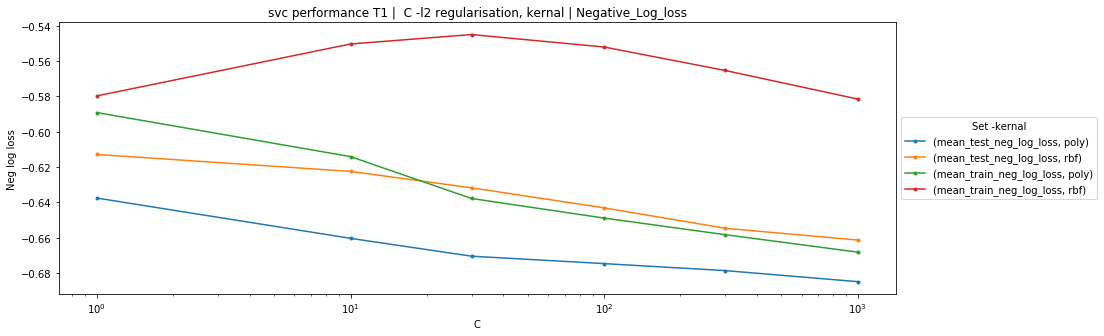

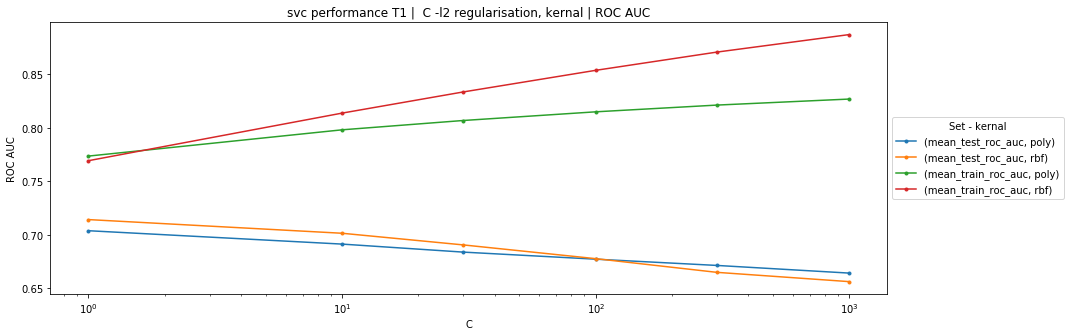

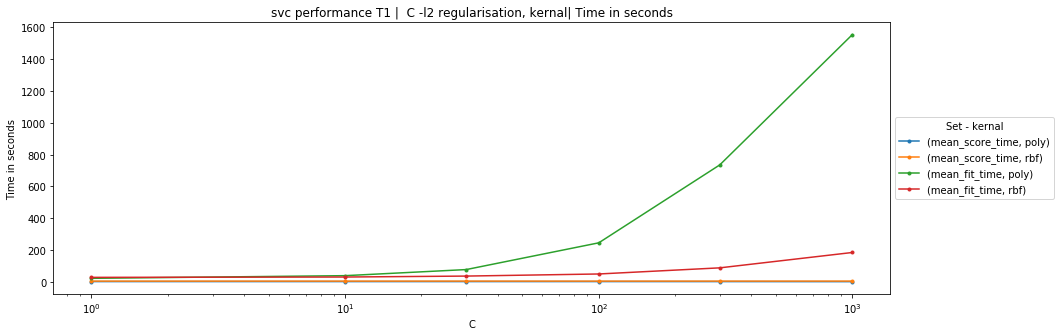

In [42]:

svc_neg_ll =  svc_performance_df.pivot(index='C', columns='kernel',
                                                values=['mean_test_neg_log_loss','mean_train_neg_log_loss']).plot(
                        title = 'svc performance T1 |  C -l2 regularisation, kernal | Negative_Log_loss',
                                                                         figsize = [15,5] ,marker = '.', legend = True,logx=True
                                                                         )


svc_neg_ll.set_ylabel('Neg log loss')
plt.legend(title = 'Set -kernal',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

svc_roc_auc = svc_performance_df.pivot(index='C', columns='kernel',
                                                values=[ 'mean_test_roc_auc','mean_train_roc_auc']).plot(
                        title = 'svc performance T1 |  C -l2 regularisation, kernal | ROC AUC',
                                                                         figsize = [15,5] ,marker = '.', legend = True,logx=True
                                                                         )


svc_roc_auc.set_ylabel('ROC AUC')
plt.legend(title = 'Set - kernal',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

svc_neg_ll_time =  svc_performance_df.pivot(index='C', columns='kernel',
                                                values=['mean_score_time','mean_fit_time']).plot(
                    title = 'svc performance T1 |  C -l2 regularisation, kernal| Time in seconds',
                                                                         figsize = [15,5] ,marker = '.',logx=True
    , legend = True
                                                                         )


svc_neg_ll_time.set_ylabel('Time in seconds')
plt.legend(title = 'Set - kernal',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [70]:
print('Bt neg_log_loss on test data',
-1*metrics.log_loss(y_pred = svc.best_estimator_.predict_proba(X_test_scaled)[:,1],y_true = y_test.values) )
print('Bt roc_auc on test data',
metrics.roc_auc_score(y_score= svc.best_estimator_.predict_proba(X_test_scaled)[:,1],y_true = y_test.values) )

Bt neg_log_loss on test data -0.6190990657509886
Bt roc_auc on test data 0.7112125622175183


In [40]:
import copy

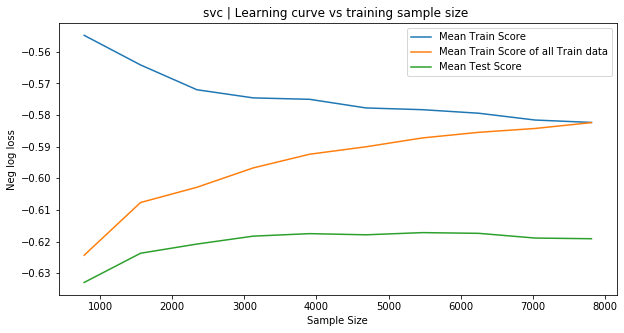

In [41]:
sample_count= list(range(int(X_train.shape[0]/10), X_train.shape[0],int(X_train.shape[0]/10)))



avg_svc_sample_size_train_nll = []
avg_svc_sample_size_all_train_nll = []
avg_svc_sample_size_test_nll = []

for i in sample_count:
    np.random.seed(0)    
    clf_1 = copy.deepcopy(svc.best_estimator_)
    clf_2 = copy.deepcopy(svc.best_estimator_)
    clf_3 = copy.deepcopy(svc.best_estimator_)
    train_1 = np.random.choice(X_train_scaled.shape[0], size=i, replace=False)  
    train_2 = np.random.choice(X_train_scaled.shape[0], size=i, replace=False)  
    train_3 = np.random.choice(X_train_scaled.shape[0], size=i, replace=False)  
    
    clf_1.fit(X_train_scaled.iloc[train_1], y_train.iloc[train_1]   )
    clf_2.fit(X_train_scaled.iloc[train_2], y_train.iloc[train_2]   )
    clf_3.fit(X_train_scaled.iloc[train_3], y_train.iloc[train_3]   )


    Avg_train_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_train_scaled.iloc[train_1])[:,1],y_true = y_train.iloc[train_1].values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_train_scaled.iloc[train_2])[:,1],y_true = y_train.iloc[train_2].values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_train_scaled.iloc[train_3])[:,1],y_true = y_train.iloc[train_3].values)
    
    
    
    ])    
    
    
    
    
    
    
    
    
    Avg_All_train_Data_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_train_scaled)[:,1],y_true = y_train.values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_train_scaled)[:,1],y_true = y_train.values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_train_scaled)[:,1],y_true = y_train.values)
    
    
    
    ])
    
    
    Avg_test_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_test_scaled)[:,1],y_true = y_test.values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_test_scaled)[:,1],y_true = y_test.values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_test_scaled)[:,1],y_true = y_test.values)
    
    
    
    ])
    
    
    avg_svc_sample_size_train_nll.append(Avg_train_log_loss)
    avg_svc_sample_size_all_train_nll.append(Avg_All_train_Data_log_loss)
    avg_svc_sample_size_test_nll.append(Avg_test_log_loss)
    
    

svc_Sample_size_learning_curve = pd.DataFrame({'Mean Train Score':avg_svc_sample_size_train_nll , 'Mean Train Score of all Train data' : avg_svc_sample_size_all_train_nll
              
              , 'Mean Test Score':avg_svc_sample_size_test_nll
              
             }, index  = sample_count
              )




svc_Sample_size_learning_curve.index.name = 'Sample Size'
svc_Sample_size_learning_curve.to_csv('Data_frames/svc_Sample_size_learning_curve_T1.csv')
svc_neg_ll_sample_size  = svc_Sample_size_learning_curve.plot(figsize = [10,5], title = 'svc | Learning curve vs training sample size ')
svc_neg_ll_sample_size.set_ylabel('Neg log loss')
plt.show()

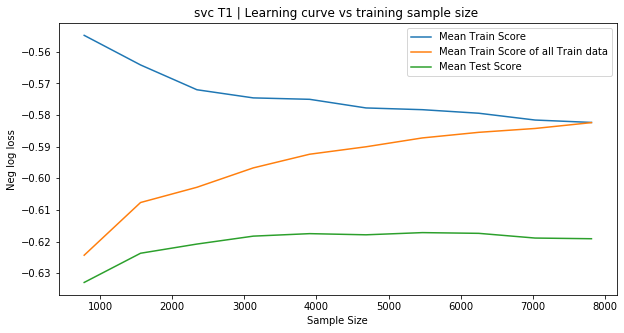

In [43]:
svc_neg_ll_sample_size  = svc_Sample_size_learning_curve.plot(figsize = [10,5], title = 'svc T1 | Learning curve vs training sample size ')
svc_neg_ll_sample_size.set_ylabel('Neg log loss')
plt.show()

## k-Nearest Neighbors. 
You should "implement" (the quotes mean I don't mean it: steal the code) kNN. Use different values of k.

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
params = { "weights" : ['uniform','distance'],
    'n_neighbors': list(range(1,10,2))+list(range(11,100,10)) + [200,500,1000,5000,7000],
}
knn = GridSearchCV(
    KNeighborsClassifier(), params, cv=5, n_jobs=-1, verbose=3,
                scoring = score
                          ,return_train_score=True, refit = 'neg_log_loss'


)
knn.fit(X_train_scaled, y_train)
with open('models/knn_grid_t1.pkl', 'wb') as fh:
    pickle.dump(knn, fh)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


C:\Users\ashup\.conda\envs\Cryptic_DVA_2022\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [-13.71750165 -13.71750165  -4.29842738  -4.36694138  -2.17859259
  -2.2553222   -1.35601702  -1.43120804  -1.0189099   -1.09064291
  -0.86757415  -0.94142162  -0.64711424  -0.71288584  -0.62535456
  -0.68627255  -0.62037242  -0.67806496  -0.61240737  -0.66785216
  -0.61339112  -0.66720919  -0.6138401   -0.66631662  -0.61372716
  -0.66561622  -0.61394434  -0.66510311  -0.62092912  -0.66673296
  -0.6309808   -0.67465984  -0.6443383   -0.68623077  -0.68321777
  -0.72244415          nan          nan]
  category=UserWarning,
C:\Users\ashup\.conda\envs\Cryptic_DVA_2022\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the train scores are non-finite: [-0.03094554 -0.03094554 -0.38080391 -0.00124217 -0.47119756 -0.0012422
 -0.50972509 -0.00124223 -0.53082477 -0.00124225 -0.54422377 -0.00124226
 -0

In [90]:

knn.best_params_

{'n_neighbors': 51, 'weights': 'uniform'}

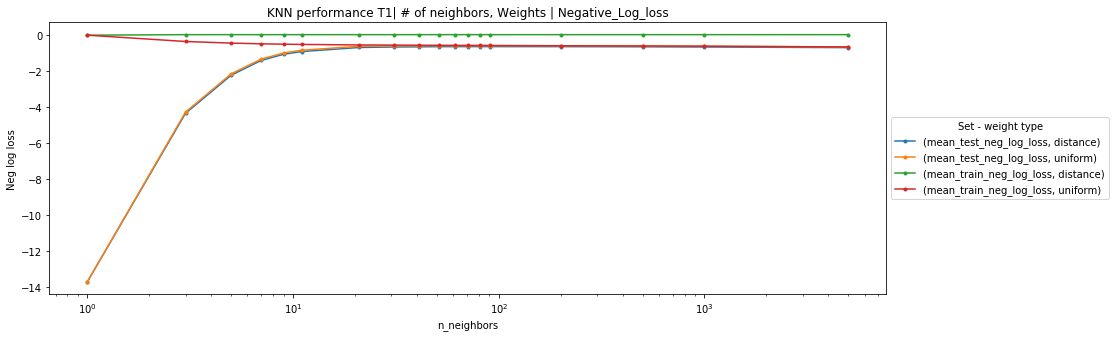

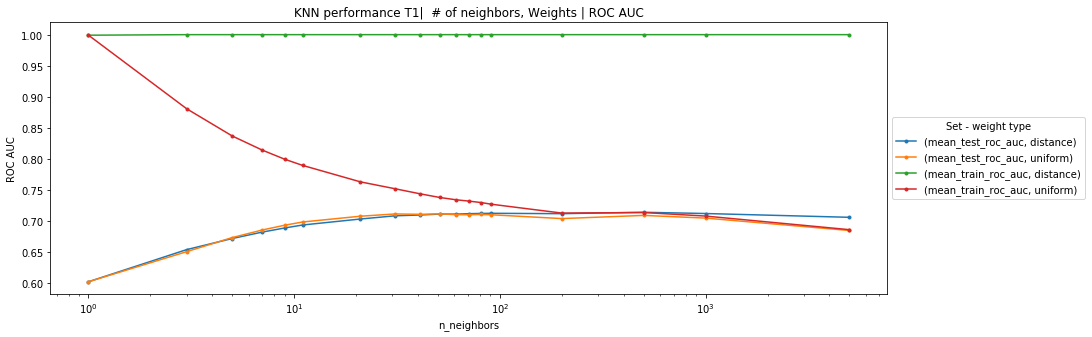

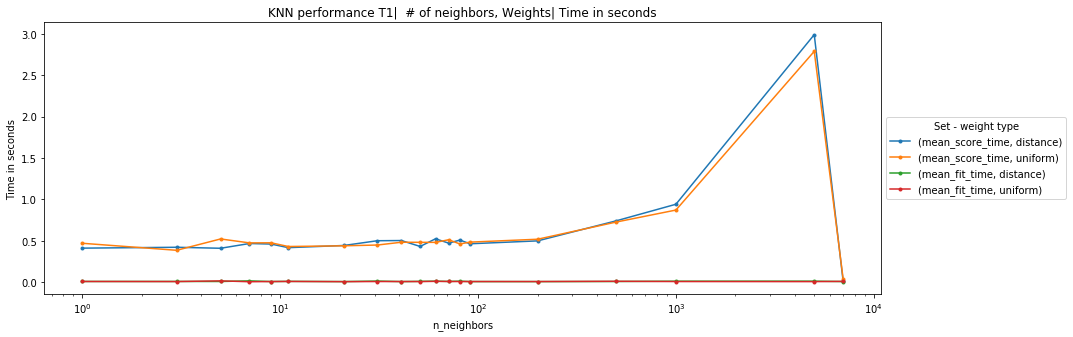

In [73]:
knn_performance_df = pd.concat([pd.DataFrame({ i:knn.cv_results_[i] for i in ['mean_fit_time','mean_score_time','mean_test_neg_log_loss','mean_train_neg_log_loss',
                                                                               
                                                                               'mean_test_roc_auc','mean_train_roc_auc'
                                                                               ] }
            ), pd.DataFrame(pd.DataFrame.from_records(knn.cv_results_['params']))],axis =1)

knn_performance_df.to_csv('Data_frames/knn_performance_df_t1.csv')
knn_neg_ll =  knn_performance_df.pivot(index='n_neighbors', columns='weights',
                                                values=['mean_test_neg_log_loss','mean_train_neg_log_loss']).plot(
                        title = 'KNN performance T1| # of neighbors, Weights | Negative_Log_loss',
                                                                         figsize = [15,5] ,marker = '.', legend = True,logx=True
                                                                         )


knn_neg_ll.set_ylabel('Neg log loss')
plt.legend(title = 'Set - weight type',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

knn_roc_auc = knn_performance_df.pivot(index='n_neighbors', columns='weights',
                                                values=[ 'mean_test_roc_auc','mean_train_roc_auc']).plot(
                        title = 'KNN performance T1|  # of neighbors, Weights | ROC AUC',
                                                                         figsize = [15,5] ,marker = '.', legend = True,logx=True
                                                                         )


knn_roc_auc.set_ylabel('ROC AUC')
plt.legend(title = 'Set - weight type',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

knn_neg_ll_time =  knn_performance_df.pivot(index='n_neighbors', columns='weights',
                                                values=['mean_score_time','mean_fit_time']).plot(
                    title = 'KNN performance T1|  # of neighbors, Weights| Time in seconds',
                                                                         figsize = [15,5] ,marker = '.',logx=True
    , legend = True
                                                                         )


knn_neg_ll_time.set_ylabel('Time in seconds')
plt.legend(title = 'Set - weight type',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [74]:
print('knn neg_log_loss on test data',
-1*metrics.log_loss(y_pred = knn.best_estimator_.predict_proba(X_test_scaled)[:,1],y_true = y_test.values) )
print('knn roc_auc on test data',
metrics.roc_auc_score(y_score= knn.best_estimator_.predict_proba(X_test_scaled)[:,1],y_true = y_test.values) )

knn neg_log_loss on test data -0.6169976179415801
knn roc_auc on test data 0.7001087018708165


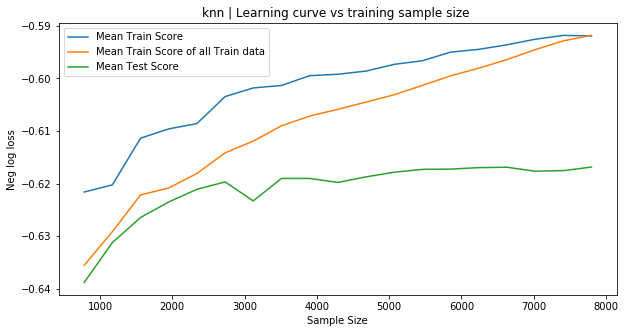

In [92]:
sample_count= list(range(int(X_train.shape[0]/10), X_train.shape[0],int(X_train.shape[0]/20)))



avg_knn_sample_size_train_nll = []
avg_knn_sample_size_all_train_nll = []
avg_knn_sample_size_test_nll = []

for i in sample_count:
    np.random.seed(0)    
    clf_1 = copy.deepcopy(knn.best_estimator_)
    clf_2 = copy.deepcopy(knn.best_estimator_)
    clf_3 = copy.deepcopy(knn.best_estimator_)
    train_1 = np.random.choice(X_train_scaled.shape[0], size=i, replace=False)  
    train_2 = np.random.choice(X_train_scaled.shape[0], size=i, replace=False)  
    train_3 = np.random.choice(X_train_scaled.shape[0], size=i, replace=False)  
    
    clf_1.fit(X_train_scaled.iloc[train_1], y_train.iloc[train_1]   )
    clf_2.fit(X_train_scaled.iloc[train_2], y_train.iloc[train_2]   )
    clf_3.fit(X_train_scaled.iloc[train_3], y_train.iloc[train_3]   )


    Avg_train_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_train_scaled.iloc[train_1])[:,1],y_true = y_train.iloc[train_1].values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_train_scaled.iloc[train_2])[:,1],y_true = y_train.iloc[train_2].values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_train_scaled.iloc[train_3])[:,1],y_true = y_train.iloc[train_3].values)
    
    
    
    ])    
    
    
    
    
    
    
    
    
    Avg_All_train_Data_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_train_scaled)[:,1],y_true = y_train.values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_train_scaled)[:,1],y_true = y_train.values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_train_scaled)[:,1],y_true = y_train.values)
    
    
    
    ])
    
    
    Avg_test_log_loss = -1*np.mean([ 
    
    metrics.log_loss(y_pred = clf_1.predict_proba(X_test_scaled)[:,1],y_true = y_test.values),
    metrics.log_loss(y_pred = clf_2.predict_proba(X_test_scaled)[:,1],y_true = y_test.values),
    metrics.log_loss(y_pred = clf_3.predict_proba(X_test_scaled)[:,1],y_true = y_test.values)
    
    
    
    ])
    
    
    avg_knn_sample_size_train_nll.append(Avg_train_log_loss)
    avg_knn_sample_size_all_train_nll.append(Avg_All_train_Data_log_loss)
    avg_knn_sample_size_test_nll.append(Avg_test_log_loss)
    
    

knn_Sample_size_learning_curve = pd.DataFrame({'Mean Train Score':avg_knn_sample_size_train_nll , 'Mean Train Score of all Train data' : avg_knn_sample_size_all_train_nll
              
              , 'Mean Test Score':avg_knn_sample_size_test_nll
              
             }, index  = sample_count
              )

knn_Sample_size_learning_curve.index.name = 'Sample Size'
knn_Sample_size_learning_curve.to_csv('Data_frames/knn_Sample_size_learning_curve_t1.csv')
knn_neg_ll_sample_size  = knn_Sample_size_learning_curve.plot(figsize = [10,5], title = 'knn | Learning curve vs training sample size ')
knn_neg_ll_sample_size.set_ylabel('Neg log loss')
plt.show()

# Testing

In addition to implementing (wink) the algorithms described above, you should design two interesting classification problems. 

For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples. I don't care where you get the data. You can download some, take some from your own research, or make some up on your own. 

Be careful about the data you choose, though. You'll have to explain why they are interesting, use them in later assignments, and come to really care about them.

# Submissions
1. README.txt containing instructions for running your code 
    - get to your code and your data , URL of some sort.
    - provide any files you found necessary to change and enough support and explanation so we could reproduce your results
